# Cluster Profiling and Visualization

This notebook analyzes and visualizes the customer segments generated by MiniBatchKMeans. We will load the clustered data, compute summary statistics for each cluster, and create visualizations to better understand the characteristics of each segment.

In [13]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style='whitegrid')

## Load and Explore Data

Load the clustered data and perform basic exploratory data analysis (EDA).

In [14]:
# Load clustered data
clustered_path = '../data/minibatch_kmeans_clusters.csv'
df = pd.read_csv(clustered_path)

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,cluster
0,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,4
1,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI,3
2,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI,3
3,2024-02-06,09:44:56,"""CNR4096693""",Completed,"""CID4670564""",Auto,AIIMS,Narsinghpur,5.1,18.1,...,NaN,NaN,NaN,NaN,316.0,4.85,4.1,4.6,UPI,4
4,2024-06-17,15:45:58,"""CNR2002539""",Completed,"""CID6800553""",Go Mini,Vaishali,Punjabi Bagh,7.1,20.4,...,NaN,NaN,NaN,NaN,640.0,41.24,4.0,4.1,UPI,2


In [3]:
# Basic EDA
print('DataFrame shape:', df.shape)
df.info()
print('\nMissing values per column:')
print(df.isnull().sum())
df.describe(include='all')

DataFrame shape: (2000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Date                               2000 non-null   object 
 1   Time                               2000 non-null   object 
 2   Booking ID                         2000 non-null   object 
 3   Booking Status                     2000 non-null   object 
 4   Customer ID                        2000 non-null   object 
 5   Vehicle Type                       2000 non-null   object 
 6   Pickup Location                    2000 non-null   object 
 7   Drop Location                      2000 non-null   object 
 8   Avg VTAT                           2000 non-null   float64
 9   Avg CTAT                           2000 non-null   float64
 10  Cancelled Rides by Customer        0 non-null      float64
 11  Reason for cancelling by Cus

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,cluster
count,2000,2000,2000,2000,2000,2000,2000,2000,2000.000000,2000.000000,...,0.0,0.0,0.0,0.0,2000.000000,2000.000000,2000.000000,2000.000000,2000,2000.000000
unique,364,1976,1999,1,2000,7,176,176,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN
top,2024-03-21,21:46:54,"""CNR4434969""",Completed,"""CID9115931""",Auto,Jahangirpuri,Yamuna Bank,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UPI,NaN
freq,14,2,2,2000,1,473,24,21,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,921,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.536900,29.902750,...,NaN,NaN,NaN,NaN,519.295000,26.098115,4.216750,4.402800,NaN,1.490500
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.758179,8.724841,...,NaN,NaN,NaN,NaN,409.342614,13.621903,0.446782,0.440658,NaN,1.213526
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,15.000000,...,NaN,NaN,NaN,NaN,50.000000,2.010000,3.000000,3.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.300000,22.400000,...,NaN,NaN,NaN,NaN,233.000000,14.990000,4.000000,4.200000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.400000,30.000000,...,NaN,NaN,NaN,NaN,418.000000,25.770000,4.300000,4.400000,NaN,1.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.825000,37.400000,...,NaN,NaN,NaN,NaN,701.500000,37.322500,4.500000,4.800000,NaN,3.000000


## Cluster Summary Statistics

Compute summary statistics for each cluster to profile customer segments.

In [15]:
# Summary statistics per cluster (numeric columns only for mean/median)
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('cluster', errors='ignore')
cluster_summary = df.groupby('cluster')[numeric_cols].agg(['mean', 'median'])
# Add count for all columns
cluster_counts = df.groupby('cluster').size().to_frame('count')
cluster_summary = pd.concat([cluster_summary, cluster_counts], axis=1)
cluster_summary

,"(Avg VTAT, mean)","(Avg VTAT, median)","(Avg CTAT, mean)","(Avg CTAT, median)","(Cancelled Rides by Customer, mean)","(Cancelled Rides by Customer, median)","(Reason for cancelling by Customer, mean)","(Reason for cancelling by Customer, median)","(Cancelled Rides by Driver, mean)","(Cancelled Rides by Driver, median)",...,"(Incomplete Rides Reason, median)","(Booking Value, mean)","(Booking Value, median)","(Ride Distance, mean)","(Ride Distance, median)","(Driver Ratings, mean)","(Driver Ratings, median)","(Customer Rating, mean)","(Customer Rating, median)",count
cluster,,,,,,,,,,,,,,,,,,,,,
0,8.498760,8.5,30.014214,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1443.522213,1301.0,26.047075,25.87,4.274366,4.3,4.449564,4.4,7338
1,8.525180,8.5,30.042250,30.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,439.843195,394.0,23.892432,23.55,3.546771,3.6,4.534262,4.6,15548
2,8.542900,8.6,29.986863,30.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,450.354708,400.0,27.516346,27.89,4.232382,4.2,3.621731,3.7,12788
3,8.539246,8.6,30.065079,30.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,423.714330,384.0,38.815920,39.22,4.386980,4.3,4.563412,4.6,28925
4,8.466146,8.4,30.026696,30.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,415.980177,376.0,13.408097,13.15,4.434868,4.4,4.512704,4.5,28401


## Cluster Visualizations

Visualize the distribution of key features across clusters.

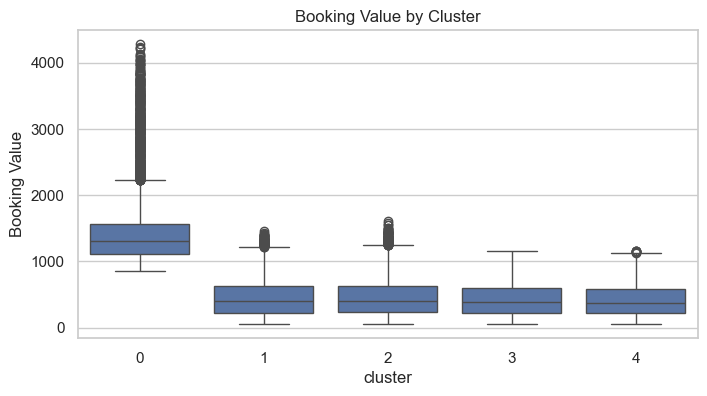

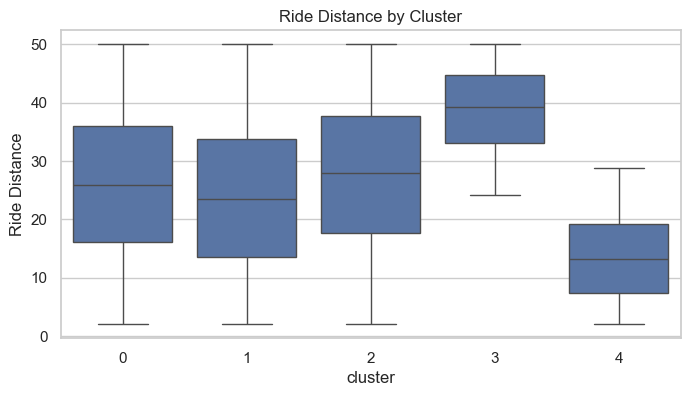

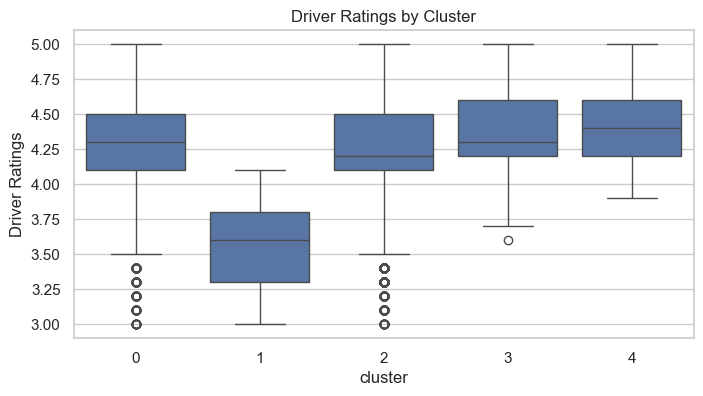

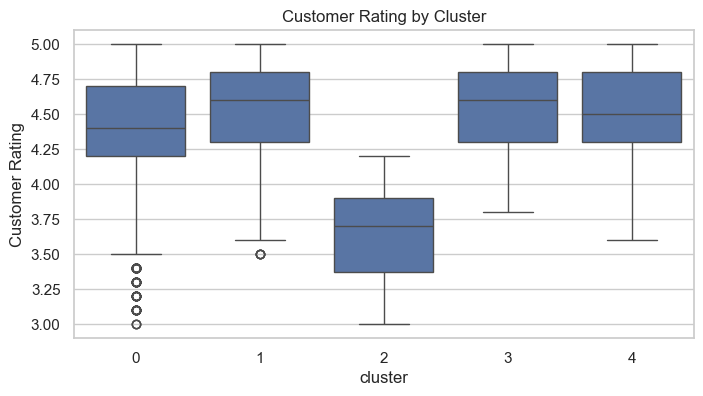

In [16]:
# Boxplots of numeric features by cluster
numeric_features = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'{feature} by Cluster')
    plt.show()

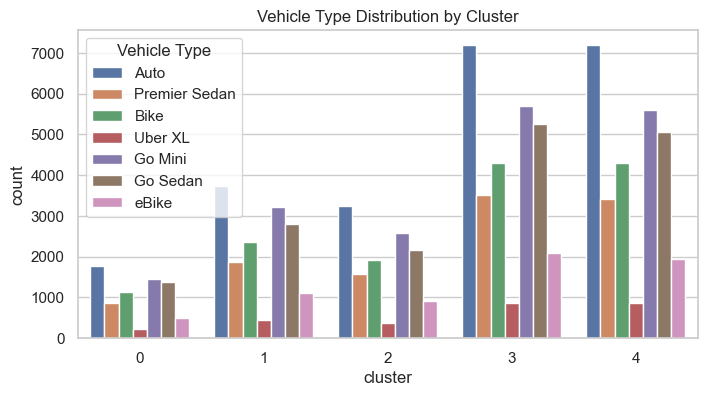

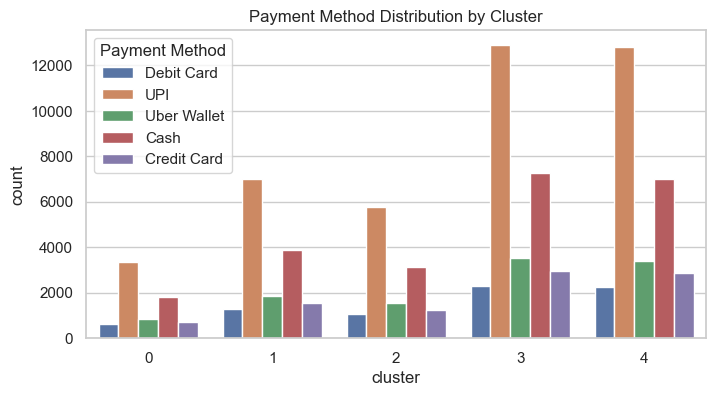

In [17]:
# Bar charts of categorical features by cluster
categorical_features = ['Vehicle Type', 'Payment Method']

for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='cluster', hue=feature, data=df)
    plt.title(f'{feature} Distribution by Cluster')
    plt.legend(title=feature)
    plt.show()

## Cluster Insights and Interpretation

Summarize the key characteristics and potential business actions for each cluster based on the analysis above.

## Model Validation: Cluster Quality Metrics

Evaluate the quality and stability of the clusters using silhouette score and by testing different k values.

In [18]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Calculate silhouette score for current clustering
from sklearn.metrics import silhouette_score
from src.features.feature_pipeline import build_feature_pipeline

# Prepare features as in clustering script
numeric_features = ['Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
categorical_features = ['Vehicle Type', 'Payment Method']

pipeline = build_feature_pipeline(numeric_features, categorical_features)
X = pipeline.fit_transform(df)

score = silhouette_score(X, df['cluster'])
print(f'Silhouette Score for k={df["cluster"].nunique()}: {score:.3f}')

Silhouette Score for k=5: 0.148


Silhouette Score for k=2: 0.118
Silhouette Score for k=3: 0.106
Silhouette Score for k=4: 0.115
Silhouette Score for k=5: 0.129
Silhouette Score for k=6: 0.107


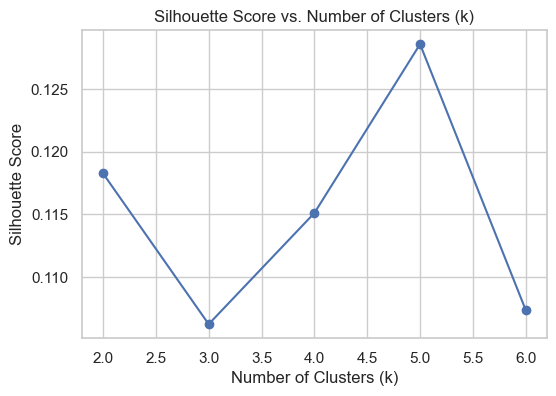

In [12]:
# Test silhouette scores for different k values (cluster stability)
from sklearn.cluster import MiniBatchKMeans

k_values = [2, 3, 4, 5, 6]
scores = []

for k in k_values:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=256)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    scores.append(score)
    print(f'Silhouette Score for k={k}: {score:.3f}')

# Optional: plot silhouette scores
plt.figure(figsize=(6,4))
plt.plot(k_values, scores, marker='o')
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()